# Klasifikasi dataset MLBB_Kompetitif (Anton W)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Install openpyxl dan pandas
!pip install openpyxl
!pip install pandas
# PURPOSE: to prevent any plot open in a new tab
%matplotlib inline
pd.pandas.set_option('display.max_column', None)

In [ ]:
sumberdata= pd.read_csv('/content/MLBB_kompetitif.csv')
print(sumberdata.shape)
sumberdata.head() # menampilkan data

(105, 6)


,nama_hero,role,win_rate,pick_rate,ban_rate,release_year
0,Terizla,fighter,47.00,0.15,0.02,2019
1,Martis,fighter,45.00,0.15,0.02,2018
2,Grock,tank,47.69,0.14,0.02,2017
3,Carmilla,support,53.76,0.08,0.02,2020
4,Irithel,marksman,51.52,0.38,0.03,2017


Visualisasi jumlah role (Utk membuktikan  membuktikan imbalance data)

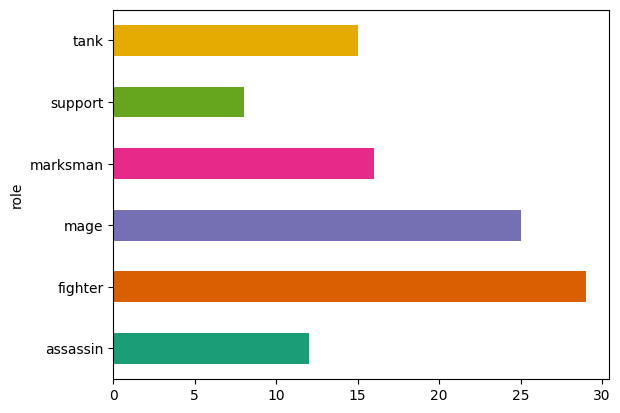

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sumberdata.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

Klasifikasi  role hero (menggunakan decision tree)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
sumberdata= pd.read_csv('/content/MLBB_kompetitif.csv') #Membaca  data
#memisahkan fitur x dan y
x = sumberdata['nama_hero']
y = sumberdata['role']
encoder = OneHotEncoder()
# Melakukan one-hot encoding pada fitur x
x_encoded = encoder.fit_transform(x.values.reshape(-1, 1)).toarray()
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=100)
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=100)
model.fit(x_train, y_train)
# Memprediksi label untuk data uji
y_pred = model.predict(x_test)
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
datapersen = accuracy*100
print(f"Dalam Persen= {datapersen:.2f}")
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.38095238095238093
Dalam Persen= 38.10

Confusion Matrix:
[[0 1 0 0 0 0]
 [0 8 0 0 0 0]
 [0 3 0 0 0 0]
 [0 4 0 0 0 0]
 [0 2 0 0 0 0]
 [0 3 0 0 0 0]]


In [ ]:
print (y_train)

70     marksman
11     marksman
32      fighter
101    assassin
86     assassin
         ...   
79     assassin
87      fighter
67         tank
24         tank
8          mage
Name: role, Length: 84, dtype: object


*   Akurasi sebesar 38  persen, hal ini dikarenakan inbalance data yang ada    

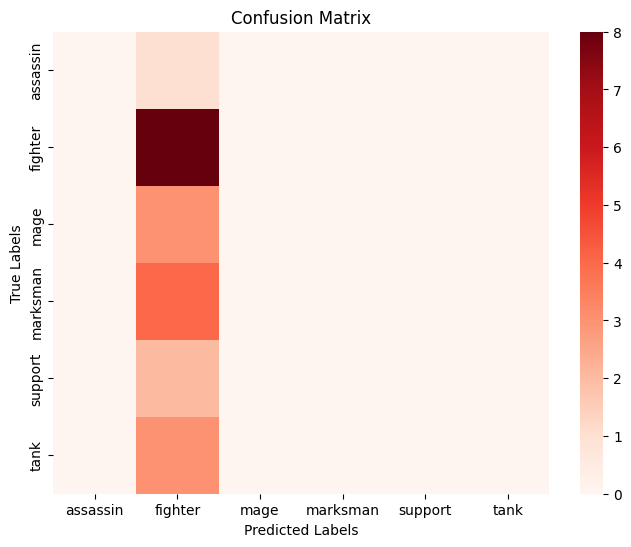

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sns
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Membuat visualisasi confusion matrix
plot.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=Fals, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.title('Confusion Matrix')
plot.show()

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f" NILAI F1-score  {f1:.2f}")

 NILAI F1-score  0.21


**Berdasarkan F1 score model yang dibangun memiliki kinerja buruk**


NIlAI PRESISI

In [ ]:
from sklearn.metrics import precision_score
# Menghitung presisi
presisi = precision_score(y_test, y_pred, average='weighted')
print(f" NILAI presisi  {presisi:.2f}")

 NILAI presisi  0.15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Hanya sekitar 35 persen dari data yang benar- benar memklasifikasikan hero sesuai rolenya**

Mencari Recall

In [ ]:
from sklearn.metrics import recall_score
# Menghitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f" Nilai  recall  {recall:.2f}")
#

 Nilai  recall  0.38


**Bahwa 38 persen dari total sampel yang berhasil diidentifikasi benar oleh model**

#Regression (Linear Regression) [Fatih]

##Install dan Import library

In [ ]:
!pip install hvplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

##Pengenalan dataset dan eksplorasi data awal

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Stechoq-ML/Kelompok/MLBB_kompetitif.csv')
url = 'https://raw.githubusercontent.com/antonwijayacakra/MACHINE-Learning-Steqhoc/master/Anton%20Wijaya_ML_%20Tugas%20Individu%20I/MLBB_kompetitif.csv'
df = pd.read_csv(url)


In [ ]:
df.head()

,nama_hero,role,win_rate,pick_rate,ban_rate,release_year
0,Terizla,fighter,47.00,0.15,0.02,2019
1,Martis,fighter,45.00,0.15,0.02,2018
2,Grock,tank,47.69,0.14,0.02,2017
3,Carmilla,support,53.76,0.08,0.02,2020
4,Irithel,marksman,51.52,0.38,0.03,2017


In [ ]:
df.shape

(105, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nama_hero     105 non-null    object 
 1   role          105 non-null    object 
 2   win_rate      105 non-null    float64
 3   pick_rate     105 non-null    float64
 4   ban_rate      105 non-null    float64
 5   release_year  105 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 5.0+ KB


In [ ]:
df.describe()

,win_rate,pick_rate,ban_rate,release_year
count,105.000000,105.000000,105.000000,105.000000
mean,50.101905,0.958000,4.383048,2017.723810
std,2.411321,0.792071,11.478032,1.457707
min,43.730000,0.050000,0.020000,2016.000000
25%,48.330000,0.320000,0.080000,2016.000000
50%,50.040000,0.720000,0.360000,2018.000000
75%,51.730000,1.430000,2.240000,2019.000000
max,56.490000,3.710000,61.290000,2021.000000


In [ ]:
df.isna().sum()

nama_hero       0
role            0
win_rate        0
pick_rate       0
ban_rate        0
release_year    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()
df['role_Encoded'] = label_encoder.fit_transform(df['role'])

df.drop(['role'], axis=1, inplace=True)

In [ ]:
df.drop(labels='nama_hero', axis=1, inplace=True)

In [ ]:
df.corr()

,win_rate,pick_rate,ban_rate,release_year,role_Encoded
win_rate,1.000000,-0.063159,-0.001592,0.045479,0.241785
pick_rate,-0.063159,1.000000,0.019745,-0.230165,-0.061087
ban_rate,-0.001592,0.019745,1.000000,0.148009,-0.181809
release_year,0.045479,-0.230165,0.148009,1.000000,0.011083
role_Encoded,0.241785,-0.061087,-0.181809,0.011083,1.000000


<Axes: >

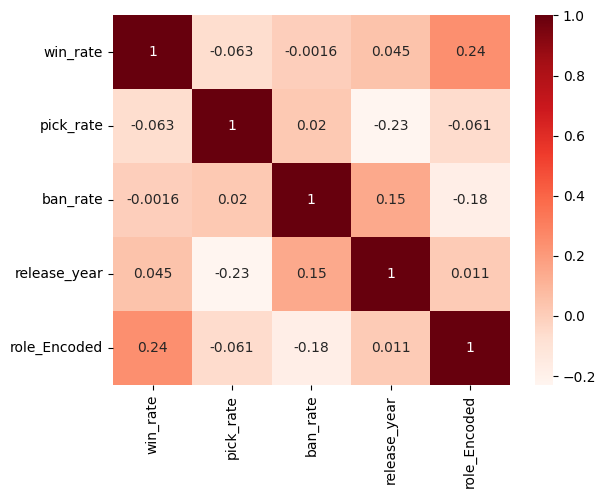

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

##Split Train Test

In [ ]:
X=df.drop('win_rate', axis=1)

y=df['win_rate']

NameError: name 'df' is not defined

In [ ]:
print("X=",X.shape,"\ny=", y.shape)

X= (105, 4) 
y= (105,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105)

In [ ]:
X_train.shape

(73, 4)

In [ ]:
X_test.shape

(32, 4)

##Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

##Model Evaluation

In [ ]:
model.coef_

array([-0.19721357,  0.0447292 , -0.29213029,  0.28113718])

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
pick_rate,-0.197214
ban_rate,0.044729
release_year,-0.292130
role_Encoded,0.281137


##Prediction

In [ ]:
y_pred = model.predict(X_test)

##Regression Evaluation Matrics

In [ ]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [ ]:
MAE

2.1387896657667564

In [ ]:
MAPE

0.04286024534051319

In [ ]:
MSE

6.4030149597178685

In [ ]:
RMSE

2.530417941708023

In [ ]:
df['win_rate'].mean()

50.10190476190477

# Clustering setiap role hero beserta namanya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# Install openpyxl dan pandas
!pip install openpyxl
!pip install pandas
# PURPOSE: to prevent any plot open in a new tab
%matplotlib inline
pd.pandas.set_option('display.max_column', None)

In [ ]:
sumberdata= pd.read_csv('/content/MLBB_kompetitif.csv')
print(sumberdata.shape)
sumberdata.head() # menampilkan data

**Menampilkan nama hero  sesuai dengan clusternya (rolenya)**

In [ ]:
data = pd.read_csv('/content/MLBB_kompetitif.csv')
X = data[['nama_hero', 'role']]
# Konversi role hero menjadi angka menggunakan one-hot encoding
X_encoded = pd.get_dummies(X)
# Jumlah cluster yang diinginkan adalah 6 kelas
kelas = 6
# Membuat model K-means
kmeans = KMeans(n_clusters=kelas, random_state=100)
# Melakukan clustering
kmeans.fit(X_encoded)
# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_
# Menambahkan label cluster ke dalam dataframe
data['cluster'] = labels
# Menampilkan hasil clustering
for cluster in range(kelas):
    heroes_in_cluster = data[data['cluster'] == cluster]['nama_hero']
    print(f"Cluster {cluster}: {heroes_in_cluster.values}")

Cluster 0: ['Grock' 'Belerick' 'Lolita' 'Akai' 'Hylos' 'Minotaur' 'Baxia' 'Barats'
 'Uranus' 'Franco' 'Tigreal' 'Atlas' 'Gatot Kaca' 'Khufra' 'Johnson']
Cluster 1: ['Terizla' 'Martis' 'Thamuz' 'Leomord' 'Minsitthar' 'Alpha' 'Ruby' 'Freya'
 'X.Borg' 'Dyrroth' 'Masha' 'Khaleed' 'Bane' 'Argus' 'Badang' 'Lapu Lapu'
 'Hilda' 'Roger' 'Alucard' 'Zilong' 'Sun' 'Chou' 'Balmond' 'Jawhead'
 'Guinevere' 'Aldous' 'Paquito' 'Yu Zhong' 'Silvanna']
Cluster 2: ['Carmilla' 'Faramis' 'Kaja' 'Estes' 'Rafaela' 'Angela' 'Diggie'
 'Mathilda']
Cluster 3: ['Lunox' 'Aurora' 'Vexana' 'Harith' 'Lylia' 'Gord' 'Cyclops' 'Kagura'
 'Odette' 'Valir' 'Alice' 'Kadita' 'Eudora' 'Pharsa' 'Cecilion' "Chang'e"
 'Nana' 'Harley' 'Vale' 'Zhask' 'Luo Yi' 'Yve' 'Esmeralda' 'Valentina'
 'Yve']
Cluster 4: ['Irithel' 'Kimmy' 'Karrie' 'Moskov' 'Clint' 'Bruno' 'Popol and Kupa'
 'Granger' 'Lesley' 'Miya' 'Hanabi' 'Yi Sun Shin' 'Claude' 'Layla'
 'Wanwan' 'Brody']
Cluster 5: ['Saber' 'Karina' 'Ling' 'Hanzo' 'Selena' 'Gusion' 'Lancelot' 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Penjelasan tiap cluster**

In [ ]:
for cluster in range(kelas):
    heroes_in_cluster = data[data['cluster'] == cluster]['role'].unique()
    print(f"Cluster {cluster}: {heroes_in_cluster}")

Cluster 0: ['tank']
Cluster 1: ['fighter']
Cluster 2: ['support']
Cluster 3: ['mage']
Cluster 4: ['marksman']
Cluster 5: ['assassin']


**VISUALISASI DATA**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=data, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Hero')
plt.title('Jumlah Hero dalam Setiap Cluster')
plt.show()

NameError: name 'plt' is not defined



* **Cluster fighter memiliki jumlah hero paling banyak**
* **Cluster support memiliki jumlah hero paling sedikit**

